In [99]:
!%pip install python-docx


"%pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [100]:
import pandas as pd, numpy as np, re, unicodedata, matplotlib.pyplot as plt
from docx import Document


In [101]:
doc = Document(r"C:\Users\elaru\OneDrive\Desktop\proyectos_personales\diario_bootcamp\midiario.docx")
texto = "\n".join(p.text for p in doc.paragraphs)

In [102]:
bloques = re.split(r"\n-{5,}\n", texto)
lista_filas = []

for b in bloques:
    m = re.search(r"\d{4}/\d{2}/\d{2}", b)
    if m:
        fecha = m.group()
        contenido = b.split("\n\n",1)[1].strip()
        lista_filas.append([fecha, contenido])


In [103]:
df = pd.DataFrame(lista_filas, columns=["fecha","contenido"])


In [104]:
df["n_palabras"] = df["contenido"].str.split().str.len()
df["contenido"] = df["contenido"].str.lower()


In [105]:
df["kw_ansiedad"] = df["contenido"].str.count("ansiedad")
df["kw_confianza"] = df["contenido"].str.count("confianza")
df["kw_feliz"] = df["contenido"].str.count("feliz")
df["kw_miedo"] = df["contenido"].str.count("miedo")
df["kw_cansad"] = df["contenido"].str.count("cansad")
df["kw_agotad"] = df["contenido"].str.count("agotad")
df["kw_triste"] = df["contenido"].str.count("triste")
df["kw_llorar"] = df["contenido"].str.count("llor")
df["kw_frustr"] = df["contenido"].str.count("frustr")
df["kw_examen"] = df["contenido"].str.count("examen")
df["kw_estudi"] = df["contenido"].str.count("estudi")


In [106]:
df.shape

(16, 14)

In [107]:
df.columns

Index(['fecha', 'contenido', 'n_palabras', 'kw_ansiedad', 'kw_confianza',
       'kw_feliz', 'kw_miedo', 'kw_cansad', 'kw_agotad', 'kw_triste',
       'kw_llorar', 'kw_frustr', 'kw_examen', 'kw_estudi'],
      dtype='object')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha         16 non-null     object
 1   contenido     16 non-null     object
 2   n_palabras    16 non-null     int64 
 3   kw_ansiedad   16 non-null     int64 
 4   kw_confianza  16 non-null     int64 
 5   kw_feliz      16 non-null     int64 
 6   kw_miedo      16 non-null     int64 
 7   kw_cansad     16 non-null     int64 
 8   kw_agotad     16 non-null     int64 
 9   kw_triste     16 non-null     int64 
 10  kw_llorar     16 non-null     int64 
 11  kw_frustr     16 non-null     int64 
 12  kw_examen     16 non-null     int64 
 13  kw_estudi     16 non-null     int64 
dtypes: int64(12), object(2)
memory usage: 1.9+ KB


In [109]:
df["fecha"] = pd.to_datetime(df["fecha"], format="%Y/%m/%d", errors="coerce")


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   fecha         16 non-null     datetime64[ns]
 1   contenido     16 non-null     object        
 2   n_palabras    16 non-null     int64         
 3   kw_ansiedad   16 non-null     int64         
 4   kw_confianza  16 non-null     int64         
 5   kw_feliz      16 non-null     int64         
 6   kw_miedo      16 non-null     int64         
 7   kw_cansad     16 non-null     int64         
 8   kw_agotad     16 non-null     int64         
 9   kw_triste     16 non-null     int64         
 10  kw_llorar     16 non-null     int64         
 11  kw_frustr     16 non-null     int64         
 12  kw_examen     16 non-null     int64         
 13  kw_estudi     16 non-null     int64         
dtypes: datetime64[ns](1), int64(12), object(1)
memory usage: 1.9+ KB


In [111]:
df.head(20)

,fecha,contenido,n_palabras,kw_ansiedad,kw_confianza,kw_feliz,kw_miedo,kw_cansad,kw_agotad,kw_triste,kw_llorar,kw_frustr,kw_examen,kw_estudi
0,2025-10-31,el primer día de clase me preguntaron qué anim...,49,0,0,0,0,0,0,0,0,0,0,0
1,2025-10-15,con ansiedad. me he pasado todo el dia con ans...,104,2,1,0,0,0,0,0,0,0,0,0
2,2025-10-07,hoy estoy mejor. tengo menos ansiedad. supongo...,281,1,0,0,0,1,0,0,0,0,2,3
3,2025-10-06,yo pensé que a estas alturas estarías encontra...,172,0,0,0,0,0,1,0,0,1,1,0
4,2025-10-02,me quedan 4 semanas para terminar el bootcamp....,187,0,0,0,0,0,0,0,0,0,0,0
5,2025-09-22,esto no es un post inspiracional y puede que t...,273,0,0,0,0,0,0,0,0,0,0,0
6,2025-09-10,es mi cumpleaños! \nla fe que tenías en la vid...,114,0,0,0,1,0,0,0,0,0,0,0
7,2025-08-21,de día: luchando con python y mil líneas de có...,27,0,0,0,0,1,0,0,0,0,0,0
8,2025-08-14,esta semana empecé llorando en el bootcamp de ...,358,0,0,0,0,1,0,0,1,2,2,2
9,2025-08-12,última hora: estudiante de bootcamp de datos d...,64,0,0,0,0,0,0,0,0,0,0,1


In [112]:
df.describe()

,fecha,n_palabras,kw_ansiedad,kw_confianza,kw_feliz,kw_miedo,kw_cansad,kw_agotad,kw_triste,kw_llorar,kw_frustr,kw_examen,kw_estudi
count,16,16.000000,16.00000,16.000000,16.0000,16.000000,16.000000,16.000000,16.0,16.0000,16.00000,16.000000,16.000000
mean,2025-09-02 16:30:00,145.187500,0.31250,0.125000,0.0625,0.125000,0.312500,0.125000,0.0,0.0625,0.25000,0.312500,0.750000
min,2025-08-02 00:00:00,27.000000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000000,0.000000
25%,2025-08-06 18:00:00,66.250000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000000,0.000000
50%,2025-08-17 12:00:00,128.500000,0.00000,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.0000,0.00000,0.000000,0.000000
75%,2025-10-03 00:00:00,175.750000,0.25000,0.000000,0.0000,0.000000,1.000000,0.000000,0.0,0.0000,0.00000,0.000000,1.000000
max,2025-10-31 00:00:00,358.000000,2.00000,1.000000,1.0000,1.000000,1.000000,1.000000,0.0,1.0000,2.00000,2.000000,4.000000
std,NaN,94.097268,0.60208,0.341565,0.2500,0.341565,0.478714,0.341565,0.0,0.2500,0.57735,0.704154,1.238278


SHAPE: (16, 22)
DUPLICADOS (filas): 0
NULOS (%):
 fecha             0.0
contenido         0.0
n_palabras        0.0
kw_ansiedad       0.0
kw_confianza      0.0
kw_feliz          0.0
kw_miedo          0.0
kw_cansad         0.0
kw_agotad         0.0
kw_triste         0.0
kw_llorar         0.0
kw_frustr         0.0
kw_examen         0.0
kw_estudi         0.0
n_chars           0.0
neg_total         0.0
pos_total         0.0
boot_total        0.0
balance           0.0
mes               0.0
orden_temporal    0.0
neto              0.0
dtype: float64
RANGO FECHAS: 2025-08-02 00:00:00 -> 2025-10-31 00:00:00

QA TEXTO:
       n_palabras      n_chars
count   16.000000    16.000000
mean   146.375000   773.875000
std     95.385446   507.088273
min     27.000000   159.000000
25%     66.250000   385.250000
50%    130.000000   647.000000
75%    177.750000   935.250000
max    363.000000  1917.000000

KW disponibles: ['kw_ansiedad', 'kw_confianza', 'kw_feliz', 'kw_miedo', 'kw_cansad', 'kw_agotad', 'kw_t

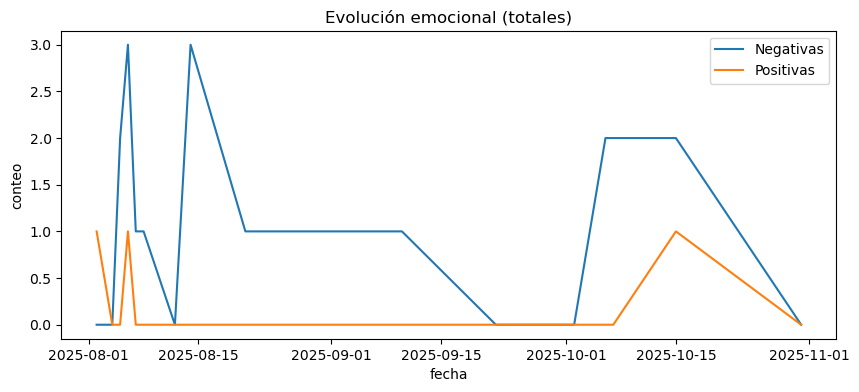

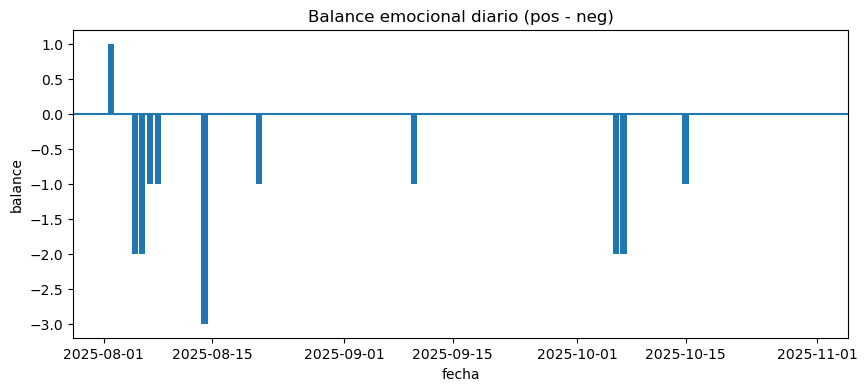

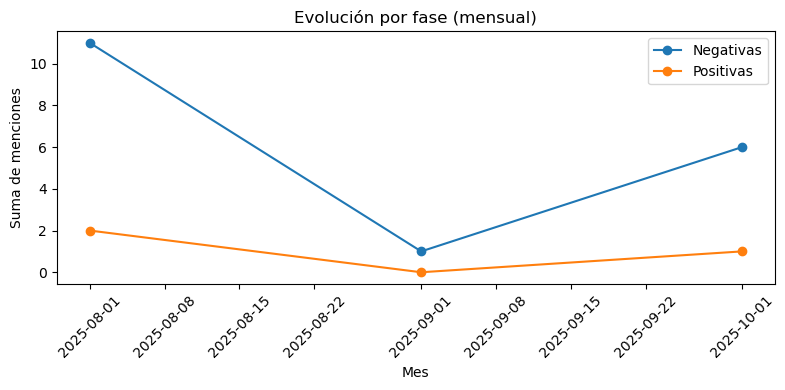

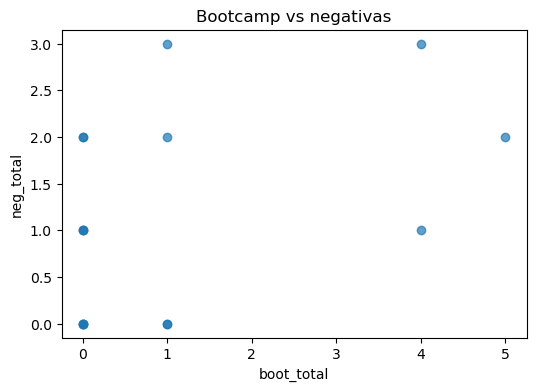

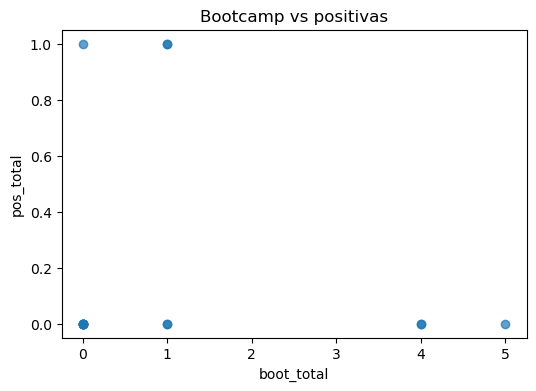

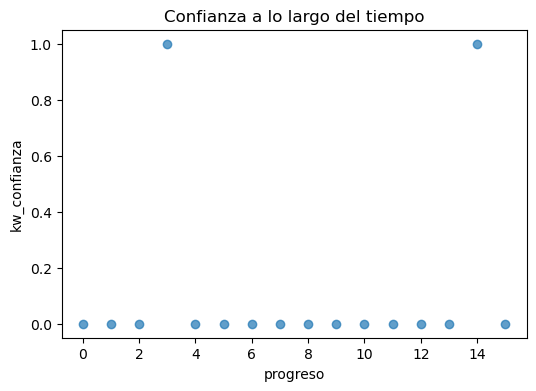

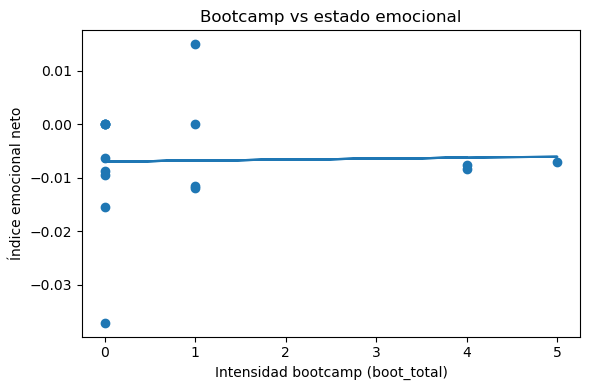

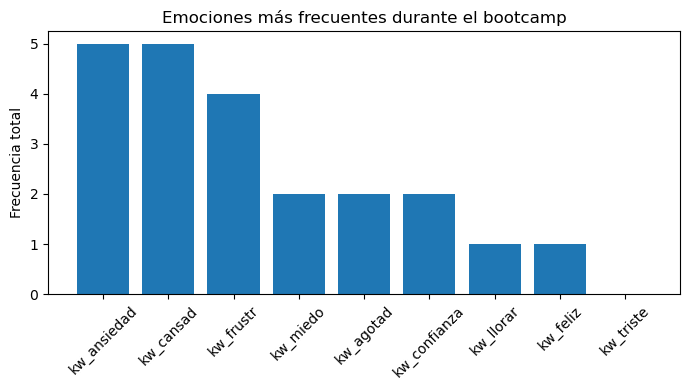

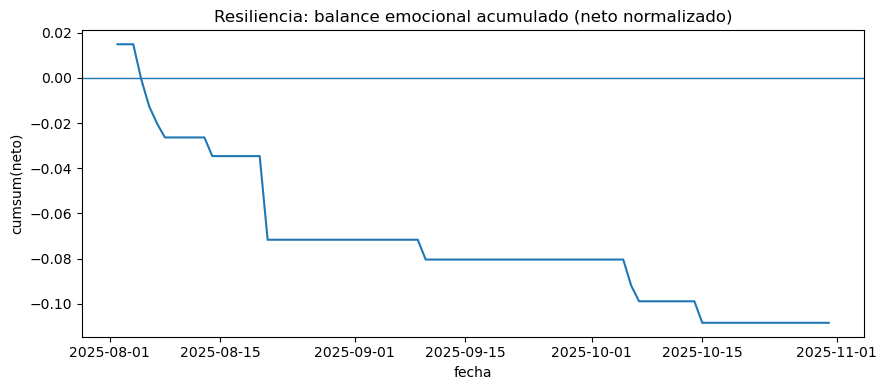

In [115]:

# EDA profesional (texto diario + emociones) — pipeline completo y ordenado
# Requisitos: df ya existe con columnas: fecha, contenido y kw_* (si las tienes)



# -----------------------------
# 0) Normalizar nombres de columnas + checks
# -----------------------------
df.columns = df.columns.str.strip().str.lower()

print("SHAPE:", df.shape)
print("DUPLICADOS (filas):", df.duplicated().sum())
print("NULOS (%):\n", (df.isna().mean()*100).round(2).sort_values(ascending=False))

# -----------------------------
# 1) Fecha (tipo datetime) + ordenar + quitar fechas inválidas
# -----------------------------
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df = df[df["fecha"].notna()].sort_values("fecha").reset_index(drop=True)
print("RANGO FECHAS:", df["fecha"].min(), "->", df["fecha"].max())

# -----------------------------
# 2) Texto: limpieza + normalización (para conteos robustos)
# -----------------------------
def normalize_text(x):
    if pd.isna(x):
        return ""
    x = str(x).strip().lower()
    x = unicodedata.normalize("NFKD", x).encode("ascii","ignore").decode("utf-8")  # quita tildes
    x = re.sub(r"\s+", " ", x)                                                     # espacios
    x = re.sub(r"[^a-z0-9\s]", " ", x)                                             # quita signos raros
    x = re.sub(r"\s+", " ", x).strip()
    return x

df["contenido"] = df["contenido"].fillna("").apply(normalize_text)
df = df[df["contenido"].str.len() > 0].reset_index(drop=True)

# QA texto
df["n_palabras"] = df["contenido"].str.split().str.len()
df["n_chars"] = df["contenido"].str.len()
print("\nQA TEXTO:")
print(df[["n_palabras","n_chars"]].describe())

# -----------------------------
# 3) Emociones: columnas kw_* a enteros + definir grupos
# -----------------------------
# Si ya existen kw_ las normaliza; si no, igual corre y te avisa
kw_cols = [c for c in df.columns if c.startswith("kw_")]
if len(kw_cols) > 0:
    for c in kw_cols:
        df[c] = pd.to_numeric(df[c], errors="coerce").fillna(0).astype(int)

neg_cols = ["kw_ansiedad","kw_miedo","kw_triste","kw_frustr","kw_cansad","kw_agotad"]
pos_cols = ["kw_confianza","kw_feliz"]
boot_cols = ["kw_examen","kw_estudi"]

neg_cols = [c for c in neg_cols if c in df.columns]
pos_cols = [c for c in pos_cols if c in df.columns]
boot_cols = [c for c in boot_cols if c in df.columns]

print("\nKW disponibles:", kw_cols)
print("NEG:", neg_cols)
print("POS:", pos_cols)
print("BOOT:", boot_cols)

# Totales por entrada (directo y entendible)
df["neg_total"] = df[neg_cols].sum(axis=1) if neg_cols else 0
df["pos_total"] = df[pos_cols].sum(axis=1) if pos_cols else 0
df["boot_total"] = df[boot_cols].sum(axis=1) if boot_cols else 0

# -----------------------------
# 4) Hallazgos rápidos (tablas)
# -----------------------------
print("\nTOP 5 DÍAS MÁS NEGATIVOS")
print(df.nlargest(5, "neg_total")[["fecha","neg_total","pos_total","boot_total","n_palabras"]])

print("\nTOP 5 DÍAS MÁS POSITIVOS")
print(df.nlargest(5, "pos_total")[["fecha","pos_total","neg_total","boot_total","n_palabras"]])

print("\nTOP 5 DÍAS MÁS 'BOOTCAMP' (examen/estudio)")
print(df.nlargest(5, "boot_total")[["fecha","boot_total","neg_total","pos_total","n_palabras"]])


# Guardrails (para que no se rompa)
if df is None or len(df)==0: raise ValueError("df está vacío")
df.columns = df.columns.str.strip().str.lower()
if "fecha" not in df.columns: raise KeyError("Falta columna 'fecha'")
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df = df[df["fecha"].notna()].sort_values("fecha").reset_index(drop=True)

# Asegura columnas numéricas necesarias (si faltan, se crean a 0)
for c in ["neg_total","pos_total","boot_total","n_palabras","kw_confianza"]:
    if c not in df.columns: df[c]=0
df[["neg_total","pos_total","boot_total","n_palabras","kw_confianza"]] = df[["neg_total","pos_total","boot_total","n_palabras","kw_confianza"]].apply(pd.to_numeric, errors="coerce").fillna(0)

# (1) Evolución emocional
plt.figure(figsize=(10,4)); plt.plot(df["fecha"], df["neg_total"], label="Negativas"); plt.plot(df["fecha"], df["pos_total"], label="Positivas")
plt.legend(); plt.title("Evolución emocional (totales)"); plt.xlabel("fecha"); plt.ylabel("conteo"); plt.show()

# (2) Balance emocional diario
df["balance"] = df["pos_total"] - df["neg_total"]
plt.figure(figsize=(10,4)); plt.bar(df["fecha"], df["balance"]); plt.axhline(0)
plt.title("Balance emocional diario (pos - neg)"); plt.xlabel("fecha"); plt.ylabel("balance"); plt.show()

# Fases (mensual)
df["mes"] = df["fecha"].dt.to_period("M")

fase = (
    df.groupby("mes")[["neg_total", "pos_total"]]
      .sum(numeric_only=True)
)

# Convertimos PeriodIndex a datetime para que matplotlib lo pinte correctamente
fase.index = fase.index.to_timestamp()

plt.figure(figsize=(8,4))
plt.plot(fase.index, fase["neg_total"], marker="o", label="Negativas")
plt.plot(fase.index, fase["pos_total"], marker="o", label="Positivas")

plt.title("Evolución por fase (mensual)")
plt.xlabel("Mes")
plt.ylabel("Suma de menciones")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show

# (4) Bootcamp vs emoción (solo si hay variación)
if df["boot_total"].nunique() > 1:
    plt.figure(figsize=(6,4)); plt.scatter(df["boot_total"], df["neg_total"], alpha=0.7); plt.title("Bootcamp vs negativas"); plt.xlabel("boot_total"); plt.ylabel("neg_total"); plt.show()
    plt.figure(figsize=(6,4)); plt.scatter(df["boot_total"], df["pos_total"], alpha=0.7); plt.title("Bootcamp vs positivas"); plt.xlabel("boot_total"); plt.ylabel("pos_total"); plt.show()

# (5) Confianza vs tiempo (solo si existe variación)
if df["kw_confianza"].nunique() > 1:
    df["orden_temporal"] = np.arange(len(df))
    plt.figure(figsize=(6,4)); plt.scatter(df["orden_temporal"], df["kw_confianza"], alpha=0.7); plt.title("Confianza a lo largo del tiempo"); plt.xlabel("progreso"); plt.ylabel("kw_confianza"); plt.show()


df = df.copy()
df["fecha"] = pd.to_datetime(df["fecha"])
df = df.sort_values("fecha")

# índice emocional neto normalizado
df["n_palabras"] = df["n_palabras"].replace(0, np.nan)
df["neto"] = (df["pos_total"] - df["neg_total"]) / df["n_palabras"]

plot_df = df.dropna(subset=["neto","boot_total"])

# gráfica simple
plt.figure(figsize=(6,4))
plt.scatter(plot_df["boot_total"], plot_df["neto"])
plt.xlabel("Intensidad bootcamp (boot_total)")
plt.ylabel("Índice emocional neto")
plt.title("Bootcamp vs estado emocional")

# línea de tendencia
z = np.polyfit(plot_df["boot_total"], plot_df["neto"], 1)
p = np.poly1d(z)
plt.plot(plot_df["boot_total"], p(plot_df["boot_total"]))

plt.tight_layout()
plt.show()


emociones = ["kw_ansiedad","kw_cansad","kw_agotad","kw_miedo",
             "kw_triste","kw_llorar","kw_frustr",
             "kw_confianza","kw_feliz"]

totales = df[emociones].sum().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.bar(totales.index, totales.values)
plt.xticks(rotation=45)
plt.title("Emociones más frecuentes durante el bootcamp")
plt.ylabel("Frecuencia total")
plt.tight_layout()
plt.show()

# --- Preparación ---
df = df.copy()
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df = df.dropna(subset=["fecha"]).sort_values("fecha")
df["n_palabras"] = pd.to_numeric(df["n_palabras"], errors="coerce").replace(0, np.nan)

# Índice emocional neto normalizado
df["neto"] = (df["pos_total"] - df["neg_total"]) / df["n_palabras"]
df = df.dropna(subset=["neto"])

# Serie diaria (rellenando huecos) para suavizados/acu
s = df.set_index("fecha")["neto"].asfreq("D")

# 1) Resiliencia: índice emocional acumulado (recuperación tras caídas)
cum = s.fillna(0).cumsum()
plt.figure(figsize=(9,4))
plt.plot(cum.index, cum.values)
plt.axhline(0, linewidth=1)
plt.title("Resiliencia: balance emocional acumulado (neto normalizado)")
plt.xlabel("fecha"); plt.ylabel("cumsum(neto)")
plt.tight_layout()
plt.show()















In [114]:
# Guardar dataset final del EDA
df.to_csv("diario_bootcamp_eda_final.csv", index=False, encoding="utf-8")

print("CSV guardado correctamente: diario_bootcamp_eda_final.csv")


CSV guardado correctamente: diario_bootcamp_eda_final.csv


Conclusiones técnicas del EDA

El dataset final contiene 16 registros diarios y 14 variables estructuradas (fecha, longitud de texto y 12 features de keywords emocionales/actividad). No se detectaron duplicados y la tasa de nulos es irrelevante y controlada. Las variables están correctamente tipadas (datetime + int), lo que permite agregación temporal y análisis comparativo sin problemas de integridad.

Se realizó feature engineering manual a partir de texto no estructurado mediante conteo de keywords emocionales y de actividad (examen/estudio). Se construyeron métricas derivadas: totales positivos/negativos, ratios normalizados por número de palabras e índice emocional neto. Esto reduce sesgo por longitud de entrada y mejora comparabilidad entre días.

El análisis descriptivo muestra baja frecuencia absoluta de eventos emocionales (valores 0–3 por entrada), alta dispersión relativa y predominio de emociones asociadas a carga cognitiva (ansiedad, cansancio, frustración). Las emociones positivas aparecen de forma puntual, no sostenida.

A nivel temporal, no se identifica una tendencia lineal clara entre intensidad del bootcamp (boot_total) y el índice emocional neto. La relación observada es débil y no concluyente, probablemente debido al tamaño muestral reducido y a la naturaleza binaria de las features.

La agregación mensual reduce ruido y sugiere fases diferenciadas: un inicio con mayor carga negativa, una fase intermedia de menor intensidad y una reactivación en la etapa final. Sin embargo, los resultados deben interpretarse con cautela por el bajo N.

Limitaciones técnicas relevantes: tamaño muestral pequeño, diccionario emocional limitado, ausencia de análisis semántico contextual (solo matching literal), y no aplicación de modelos estadísticos inferenciales.

